In [442]:
from sklearn.preprocessing import LabelBinarizer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


label_binarizer = LabelBinarizer()
imputer = SimpleImputer(strategy="mean")
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [443]:
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier,MLPRegressor

wine_dataset = pd.read_csv('WineQT.csv')
wine_dataset = np.array(wine_dataset)
wine_dataset = wine_dataset[:,:-1]
X = wine_dataset[:,:-1]
y = wine_dataset[:,-1]
y = np.reshape(y,(1143,1))
print(X[0],y[0])

X = X.astype('float64')
y = y.astype('float64')
X = imputer.fit_transform(X)
X = min_max_scaler.fit_transform(X)
X = standard_scaler.fit_transform(X)
print(X[0],y[0])

X_train_c, X_test_total_c, y_train_c, y_test_total_c = train_test_split(X, y, test_size=0.2)

X_valid_c, X_test_c, y_valid_c, y_test_c = train_test_split(X_test_total_c, y_test_total_c, test_size=0.5)

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ] [5.]
[-0.52157961  0.93933222 -1.36502663 -0.46642142 -0.23139486 -0.45046702
 -0.3636101   0.55585438  1.27069495 -0.57365783 -0.96338181] [5.]


In [444]:

print("DT Classifier")
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train_c,y_train_c)

y_pred = DTclf.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred)
print(f"Accuracy Test: {accuracy:.2f}")

y_pred = DTclf.predict(X_valid_c)
accuracy = accuracy_score(y_valid_c, y_pred)
print(f"Accuracy Valid: {accuracy:.2f}")

DT Classifier
Accuracy Test: 0.58
Accuracy Valid: 0.61


In [445]:
data = []
with open('HousingData.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader, None)
    for row in reader:
        data.append(row)

housing_dataset = np.array(data)

X = dataset[:, :-1]  
y = dataset[:, -1]  

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i][j] == 'NA':
            X[i][j] = 0

X = X.astype(float)
y = y.astype(float)

X = min_max_scaler.fit_transform(X)
X = standard_scaler.fit_transform(X)

X_train_r, X_test_total_r, y_train_r, y_test_total_r = train_test_split(X, y, test_size=0.2)

X_valid_r, X_test_r, y_valid_r, y_test_r = train_test_split(X_test_total_r, y_test_total_r, test_size=0.5)

In [446]:
print("DT Regressor")
DTreg = DecisionTreeRegressor()
DTreg.fit(X_train_r,y_train_r)

y_pred = DTreg.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred)
print(f"MSE Test: {mse:.2f}")

y_pred = DTreg.predict(X_valid_r)
mse = mean_squared_error(y_valid_r, y_pred)
print(f"MSE Valid: {mse:.2f}")

DT Regressor
MSE Test: 33.27
MSE Valid: 47.76


In [447]:
class BaggingClf():
    def __init__(self,base_estimator,n_estimators,sample_fraction,bootstrap,voting):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap = bootstrap
        self.voting = voting
    
    def fit(self,X,y):
        self.models = []
        num_samples = X.shape[0]

        if self.bootstrap:
            max_num_of_estimators = int(1/self.sample_fraction)
            self.n_estimators = min(self.n_estimators,max_num_of_estimators)

        for i in range(self.n_estimators):
            if self.bootstrap:
                sample_indices = np.random.choice(num_samples, size=int(self.sample_fraction * num_samples), replace=True)
            else:
                sample_indices = np.random.choice(num_samples, size=int(self.sample_fraction * num_samples), replace=False)

            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            model = self.base_estimator()
            model.fit(X_sampled, y_sampled)
            self.models.append(model)

    def predict(self, X, y):
        predictions = []
        for model in self.models:
            if hasattr(model, 'predict_proba'):
                preds = model.predict_proba(X)
            else:
                preds = model.predict(X).reshape(-1, 1)
            predictions.append(preds)

        predictions = np.concatenate(predictions, axis=1)

        if self.voting_mechanism == 'hard':
            predictions = predictions.mean(axis=1)
        elif self.voting_mechanism == 'soft':
            confidences = np.array([model.predict_proba(X) for model in self.models])
            confidences = confidences.mean(axis=0)
            predictions = (predictions * confidences).sum(axis=1) / confidences.sum(axis=1)

        return predictions


In [448]:
# base_estimators = [DecisionTreeClassifier]
# n_estimators = [5,10,15,20]
# voting = ['hard','soft']
# sampling_fraction = [0.15, 0.25, 0.5, 0.75, 1.0]
# bootstrap = [True,False]

# accuracy_list = []
# for base_estimator in base_estimators:
#     for n_est in n_estimators:
#         for s_frac in sampling_fraction:
#             for bootstrp in bootstrap:
#                 for votin_mech in voting:
#                     ensemble_model = BaggingClf(base_estimator,n_est,s_frac,bootstrap,votin_mech)
#                     ensemble_model.fit(X_train_c,y_train_c)
#                     predictions = ensemble_model.predict(X_test_c,X_valid_c,y_valid_c)
#                     mse = np.mean((y_test_c-predictions)**2)
#                     mse_results.append({
#                         'Base Estimator': base_estimator.__name__,
#                         'Number of Estimators': n_est,
#                         'Sampling Fraction': s_frac,
#                         'Bootstrap': bootstrp,
#                         'Voting Mechanism': votin_mech,
#                         'MSE': mse
#                     })

In [449]:
class BaggingReg():
    def __init__(self,base_estimator,n_estimators,sample_fraction,bootstrap,voting):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.sample_fraction = sample_fraction
        self.voting = voting
        self.bootstrap = bootstrap
        self.models = []
    
    def fit(self,X,y):
        self.models = []

        if self.bootstrap:
            max_num_of_estimators = int(1/self.sample_fraction)
            self.n_estimators = min(self.n_estimators,max_num_of_estimators)

        N = X.shape[0]
        for i in range(self.n_estimators):
            if self.bootstrap:
                sample_indices = np.random.choice(N, size=int(self.sample_fraction * N), replace=True)
            else:
                sample_indices = np.random.choice(N, size=int(self.sample_fraction * N), replace=False)
            
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            model = self.base_estimator()
            model.fit(X_sampled, y_sampled)
            self.models.append(model)

    def inverse_mse(self,model,X_val,y_val):
        y_pred = model.predict(X_val)
        mse = np.mean((y_pred-y_val)**2)
        inverse_mse = float(1/mse)
        return inverse_mse

    def predict(self,X,X_val,y_val):
        N = X.shape[0]
        predictions = np.array([model.predict(X) for model in self.models])
        confidence = np.array([self.inverse_mse(model,X_val,y_val) for model in self.models])
        normalizer = np.sum(confidence)

        predictions = np.reshape(predictions,(N,len(self.models)))
        predictions_final = []
        if self.voting == 'hard':
            predictions_final = np.round(predictions.mean(axis=1))
        elif self.voting == 'soft':
            for i in range(N):
                prediction = 0.0
                for j in range(len(predictions[i])):
                    prediction = prediction + (predictions[i][j]*confidence[j])
                prediction = prediction / normalizer
                predictions_final.append(prediction)
        return predictions_final

In [450]:
mse_list = []

base_estimators = [DecisionTreeRegressor]
n_estimators = [5,10,15,20]
voting = ['hard','soft']
sampling_fraction = [0.15, 0.25, 0.5, 0.75, 1.0]
bootstrap = [True,False]

for n_est in n_estimators:
    for bstp in bootstrap:
        for s_frac in sampling_fraction:
            for votin_mech in voting:
                for base_estimator in base_estimators:
                    ensemble_model = BaggingReg(base_estimator,n_est,s_frac,bootstrap,votin_mech)
                    ensemble_model.fit(X_train_c,y_train_c)
                    predictions = ensemble_model.predict(X_test_c,X_valid_c,y_valid_c)
                    mse_val = np.mean((y_test_c-predictions)**2)
                    mse_list.append({
                        'MSE': mse_val,
                        'Base Estimator': base_estimator.__name__,
                        'No. of Estimators': n_est,
                        'Sampling Fraction': s_frac,
                        'Bootstrap': bstp,
                        'Voting Mechanism': votin_mech,
                    })

print(mse_results[0])

{'MSE': 0.9215879017013232, 'Base Estimator': 'DecisionTreeRegressor', 'Number of Estimators': 5, 'Sampling Fraction': 0.15, 'Bootstrap': True, 'Voting Mechanism': 'hard'}


In [451]:
mse_list = sorted(mse_list, key=lambda x: x['MSE'])

print("Best-Performing Models among ALL MODELS:")
for i, model in enumerate(mse_list[:5], start=1):
    print(f"{i}. MSE: {model['MSE']:.6f} - {model}")

Best-Performing Models among ALL MODELS:
1. MSE: 0.771946 - {'MSE': 0.771945956110163, 'Base Estimator': 'DecisionTreeRegressor', 'No. of Estimators': 10, 'Sampling Fraction': 0.15, 'Bootstrap': True, 'Voting Mechanism': 'soft'}
2. MSE: 0.775999 - {'MSE': 0.7759986318521253, 'Base Estimator': 'DecisionTreeRegressor', 'No. of Estimators': 10, 'Sampling Fraction': 0.15, 'Bootstrap': False, 'Voting Mechanism': 'soft'}
3. MSE: 0.784799 - {'MSE': 0.7847989846246916, 'Base Estimator': 'DecisionTreeRegressor', 'No. of Estimators': 20, 'Sampling Fraction': 0.15, 'Bootstrap': False, 'Voting Mechanism': 'soft'}
4. MSE: 0.796739 - {'MSE': 0.7967394068653085, 'Base Estimator': 'DecisionTreeRegressor', 'No. of Estimators': 5, 'Sampling Fraction': 0.15, 'Bootstrap': True, 'Voting Mechanism': 'soft'}
5. MSE: 0.799670 - {'MSE': 0.799670126202682, 'Base Estimator': 'DecisionTreeRegressor', 'No. of Estimators': 20, 'Sampling Fraction': 0.15, 'Bootstrap': True, 'Voting Mechanism': 'soft'}


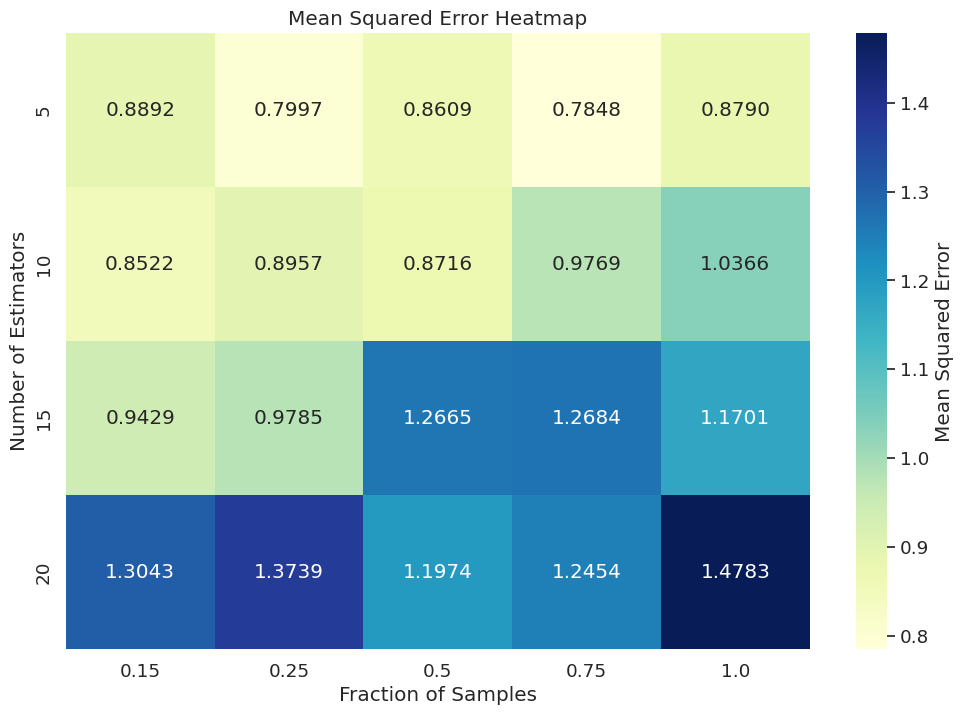

In [452]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from itertools import product

base_estimators = [DecisionTreeRegressor]
n_estimators = [5, 10, 15, 20]
sampling_fractions = [0.15, 0.25, 0.5, 0.75, 1.0]
bootstrap = [True, False]
voting = ['hard', 'soft']

mse_matrix = np.zeros((len(n_estimators), len(sampling_fractions)))

for idx, params in enumerate(product(n_estimators, sampling_fractions, bootstrap, voting)):
    n_est, s_frac, bstp, votin_mech = params
    subset_mse = [entry['MSE'] for entry in mse_list if entry['Base Estimator'] == DecisionTreeRegressor.__name__
                  and entry['No. of Estimators'] == n_est
                  and entry['Sampling Fraction'] == s_frac
                  and entry['Bootstrap'] == bstp
                  and entry['Voting Mechanism'] == votin_mech]

    mse_matrix[(idx // len(sampling_fractions)) % len(n_estimators),
               idx % len(sampling_fractions)] = np.mean(subset_mse)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(mse_matrix, annot=True, fmt=".4f",
                      xticklabels=sampling_fractions, yticklabels=n_estimators,
                      cmap="YlGnBu", cbar_kws={'label': 'Mean Squared Error'})

plt.title("Mean Squared Error Heatmap")
plt.xlabel("Fraction of Samples")
plt.ylabel("Number of Estimators")
plt.show()

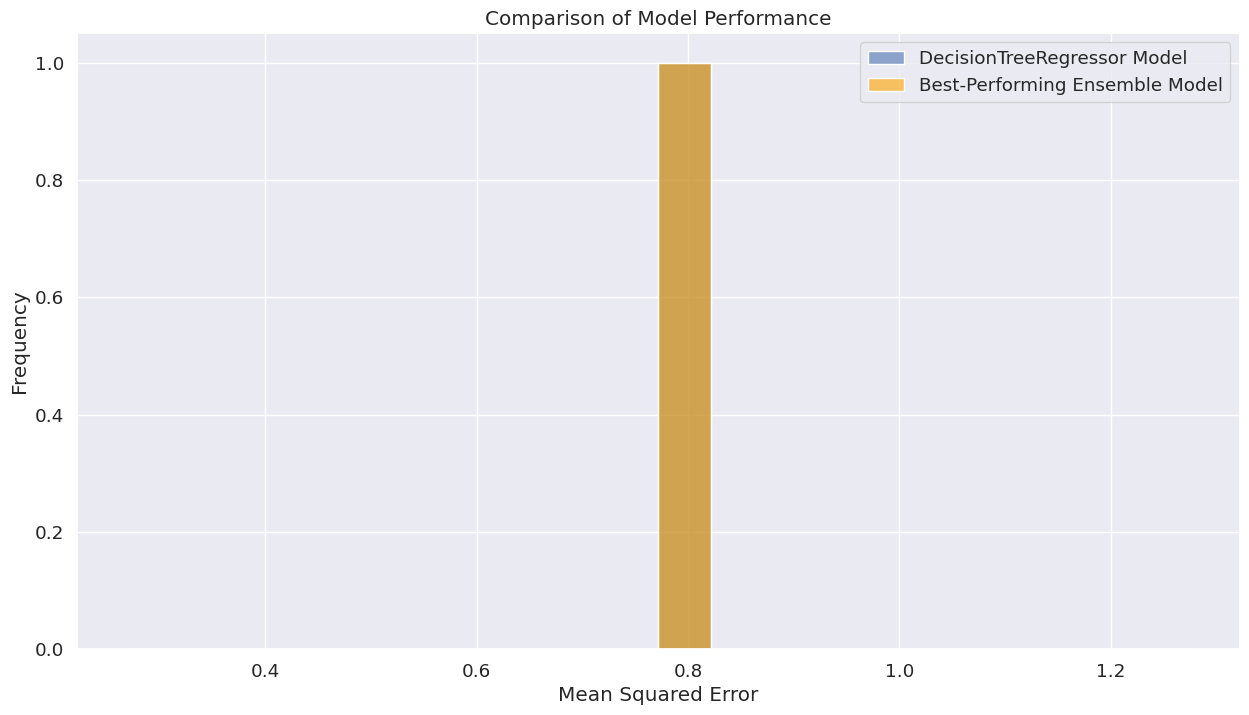

In [453]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from itertools import product

base_estimators = [DecisionTreeRegressor]
n_estimators = [5, 10, 15, 20]
sampling_fractions = [0.15, 0.25, 0.5, 0.75, 1.0]
bootstrap = [True, False]
voting = ['hard', 'soft']

mse_matrix = np.zeros((len(n_estimators), len(sampling_fractions)))

best_performing_ensemble_mse = np.inf
best_performing_ensemble_params = None

for idx, params in enumerate(product(n_estimators, sampling_fractions, bootstrap, voting)):
    n_est, s_frac, bstp, votin_mech = params
    subset_mse = [entry['MSE'] for entry in mse_list if entry['Base Estimator'] == DecisionTreeRegressor.__name__
                  and entry['No. of Estimators'] == n_est
                  and entry['Sampling Fraction'] == s_frac
                  and entry['Bootstrap'] == bstp
                  and entry['Voting Mechanism'] == votin_mech]

    mse_mean = np.mean(subset_mse)
    mse_matrix[(idx // len(sampling_fractions)) % len(n_estimators), idx % len(sampling_fractions)] = mse_mean

    if mse_mean < best_performing_ensemble_mse:
        best_performing_ensemble_mse = mse_mean
        best_performing_ensemble_params = params

fig, ax = plt.subplots(figsize=(15, 8))

for base_estimator in base_estimators:
    model_mse = [entry['MSE'] for entry in mse_list if entry['Base Estimator'] == base_estimator.__name__
                 and entry['No. of Estimators'] == best_performing_ensemble_params[0]
                 and entry['Sampling Fraction'] == best_performing_ensemble_params[1]
                 and entry['Bootstrap'] == best_performing_ensemble_params[2]
                 and entry['Voting Mechanism'] == best_performing_ensemble_params[3]]

    sns.histplot(model_mse, label=f"{base_estimator.__name__} Model", bins=20, ax=ax, alpha=0.6)

ensemble_model_mse = [entry['MSE'] for entry in mse_list if entry['Base Estimator'] == DecisionTreeRegressor.__name__
                      and entry['No. of Estimators'] == best_performing_ensemble_params[0]
                      and entry['Sampling Fraction'] == best_performing_ensemble_params[1]
                      and entry['Bootstrap'] == best_performing_ensemble_params[2]
                      and entry['Voting Mechanism'] == best_performing_ensemble_params[3]]

sns.histplot(ensemble_model_mse, label="Best-Performing Ensemble Model", bins=20, ax=ax, color='orange', alpha=0.6)

ax.set_title("Comparison of Model Performance")
ax.set_xlabel("Mean Squared Error")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()